우선 필요한 도구들을 import합니다.

In [1]:
import torch
import torch.nn as nn

GPU 연산이 가능한 경우 GPU 연산을 하도록 하고, 랜덤 시드를 고정해줍니다.

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

XOR 문제를 풀기 위한 입력과 출력을 정의해줍니다.<br>
to function은 해당 device로 값을 전달하는 역할을 수행합니다.

In [6]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

이제 다층 퍼셉트론을 설계합니다. 아래는 은닉층 1, 2, 3, 출력층을 갖는 은닉층이 3개인 인공신경망입니다.

In [7]:
model = nn.Sequential(
            nn.Linear(2, 10, bias=True), #input layer = 2, hidden layer1 = 10
            nn.Sigmoid(), # activation function
            nn.Linear(10, 10, bias=True), # hidden layer1 = 10, hidden layer2 = 10
            nn.Sigmoid(),
            nn.Linear(10, 10, bias=True), # hidden layer2 = 10, hidden layer3 = 10
            nn.Sigmoid(),
            nn.Linear(10, 1, bias=True), # hidden layer3 = 10, output layer = 1
            nn.Sigmoid()
).to(device)

위의 인공 신경망을 그림으로 표현하면 아래와 같습니다.
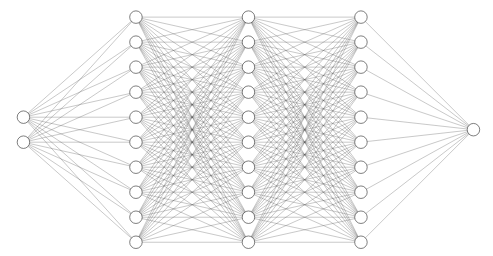
이제 비용 함수와 옵티마이저를 선언합니다. 비용함수로는 이진 분류에도 사용했던 nn.BCELoss()를 사용합니다.

In [8]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1) # modified learning rate from 0.1 to 1

총 10,001 epochs 만큼 수행합니다. 각 epoch마다 역전파가 수행됩니다.

In [9]:
for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)
    
    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    
    # 100의 배수 epoch마다 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.6948983669281006
100 0.6931558847427368
200 0.6931535005569458
300 0.6931513547897339
400 0.6931493282318115
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931362152099609
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931196451187134
2000 0.6931171417236328
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931085586547852
2400 0.693105161190033
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930880546569824
2900 0.6930825710296631
3000 0.6930763125419617
3100 0.6930692791938782
3200 0.6930612325668335
3300 0.6930519342422485
3400 0.693041205406189
3500 0.693028450012207
3600 0.6930133104324341
3700 0.6929951906204224
3800 0.6929729580879211
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928650140762329
4200 0.

5400 epcch 정도에서 cost가 급격히 감소하는 것을 볼 수 있습니다. <br>
너무 과도하게 training dataset으로 training을 진행하면 과적합(overfitting)이 발생할 수 있다는 것을 인지해야 합니다.<br>
이제 모델이 XOR 문제를 풀 수 있는지 test 해봅니다.

In [11]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.1168354e-04]
 [9.9982882e-01]
 [9.9984241e-01]
 [1.8533420e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


위 출력 결과를 바탕으로 실제값 0, 1, 1, 0 과 일치하는 예측값 0, 1, 1, 0 을 출력하며 문제를 해결하는 모습을 볼 수 있습니다.